# Assignment 3.1: Eigenmodes

This code runs part 3.1 of Assignment 3: Eigenmodes of drums or membranes of different shapes

In [ ]:
import src.diagonal_matrix as dm

from IPython.display import HTML, display

import numpy as np
import time

import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import time
import matplotlib.pyplot as plt
import matplotlib.animation as animation

### 1.1 Matrix of eigenvalue problem

The following function creates a diagonal Matrix for the eigenvalue problem with Dirichlet boundary conditions.

In [ ]:
# The length of the system matrix
length = 4

diag_M = dm.diagonal_matrix(length)

print(diag_M)

Note: It may not be visible on the output, but the 4th position from (-4) in either direction contains a 1 such that: [..., 0, 1, 0, 0, 1, -4, 1, 0, 0, 1, 0, ...]. Except for the boundary, each row/column will contain 5 entries, alligning with the 5-point-stencil. 

We can visualize this matrix with the following function. Note that for larger values of N, you should pass the parameter text='OFF'. 

In [ ]:
fig = dm.visualize_diag_matrix(diag_M, length)

We can also visualise the matrix of the circular and rectangular grid

In [ ]:
# Rectangular (L by 2L)

diag_M = dm.diagonal_rectangular(length)

# Number of rows/columns
N = 8
fig = dm.visualize_diag_matrix(diag_M, N, text='OFF')

In [ ]:
# Circular 
N = 9

diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N)

fig = dm.visualize_diag_matrix(diag_M, N, text='OFF')


### 1.2 Eigenmodes

We can now get and visualise the eigenmodes with the following function. We will take a larger matrix to better visualise it. Note that high values for N and multiple modes will take longer to run.

In [ ]:
# Number of modes to display
modes = 6
length = 50

diag_M = dm.diagonal_matrix(length)

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes(diag_M, length, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


### 1.3 Eigenmodes of Rectangular and Circular grid

In [ ]:
# Rectangular
modes = 6
length = 50

# Rectangular (L by 2L)
diag_M = dm.diagonal_rectangular(length)

# Number of rows/columns
eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, length, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, length, modes)


In [ ]:
# Rectangular
modes = 6
N = 50

#diag_M = dm.diagonal_rectangular(N)
#grid = dm.rectangular_domain(N) 
#diag_M = dm.diagonal_rectangle(grid, diag_M, N)

#eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_rectangular(diag_M, N, modes)
#dm.visualize_multiple_modes(eigenmodes, eigenvalues, N, modes)


M = dm.diagonal_rectangular(N)
eigvals, eigvecs, _, eigenmodes = dm.get_eigenmodes_rectangular(M, N, modes)
dm.visualize_rectangular_modes(eigenmodes, eigvals, N, modes)

In [ ]:
# Circular
N = 49
modes = 6

diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N) 

eigenvalues, _, _, eigenmodes = dm.get_eigenmodes_circular(diag_M, grid, N, modes)
dm.visualize_multiple_modes(eigenmodes, eigenvalues, N, modes)


In [ ]:
modes = 6
N = 50

# Time for square 
diag_M = dm.diagonal_matrix(N)

start_time = time.perf_counter() # Start Time Square reg
dm.get_eigenmodes(diag_M, N, modes)
end_time = time.perf_counter()  # End Time Square reg
elapsed_time = end_time - start_time
print(f"Time for regular square matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Square sparse
dm.get_eigenmodes_sparse_square(diag_M, N, modes)
end_time = time.perf_counter()  # End Time Square sparse
elapsed_time = end_time - start_time
print(f"Time for sparse square matrix: {elapsed_time}")


# time for rectangle
diag_M = dm.diagonal_rectangular(N)

start_time = time.perf_counter() # Start Time Rectangle reg
dm.get_eigenmodes_rectangular(diag_M, N, modes)
end_time = time.perf_counter()  # End Time rectangle reg
elapsed_time = end_time - start_time
print(f"Time for regular rectangular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Rectangle sparse
dm.get_eigenmodes_sparse_rectangular(diag_M, N, modes)
end_time = time.perf_counter()  # End Time rectangle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse rectangular matrix: {elapsed_time}")


# Time for circle
diag_M = dm.diagonal_matrix(N)
grid = dm.circular_domain(N)
diag_M = dm.diagonal_circle(grid, diag_M, N) 

start_time = time.perf_counter() # Start Time Circle reg
dm.get_eigenmodes_circular(diag_M, grid, N, modes)
end_time = time.perf_counter()  # End Time Circle reg
elapsed_time = end_time - start_time
print(f"Time for regular circular matrix: {elapsed_time}")

start_time = time.perf_counter() # Start Time Circle sparse
dm.get_eigenmodes_sparse_circular(diag_M, grid, N, modes)
end_time = time.perf_counter()  # End Time Circle sparse
elapsed_time = end_time - start_time
print(f"Time for sparse circular matrix: {elapsed_time}")

We can also plot the eigenfrequencies. This results in similar patterns. Note that to run this, please uncomment the visualisation function as it may run for several minutes, or change N to a lower value. 

In [ ]:
dm.visualize_all_eigenfrequencies(N=50)

### D. Eigenfrequencies and size $L$

We don't really define the size $L$, rather our variable length/N is about the discretization of the domain. The question does seem to ask about the discretisation as well, so that sorta ends up working I guess.

We could change the code slightly to define L and have length/N be a multiple of L, so that we can change L and easily change length/N as a result.

C:\Users\lieso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\lieso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


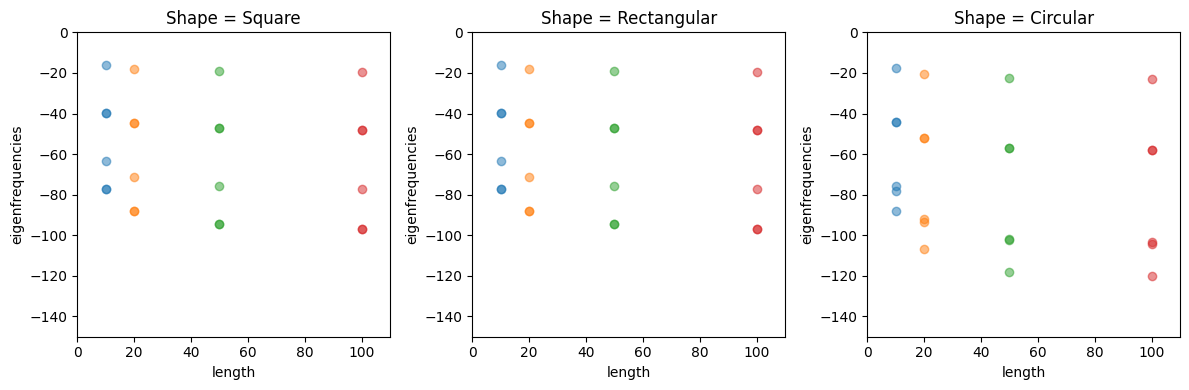

In [7]:
modes = 6
lengths = [10, 20, 50, 100]
LL_eigenfreqs = []

LL_eigenfreqs.append(dm.eigenfreqs_lengths_square(lengths))
LL_eigenfreqs.append(dm.eigenfreqs_lengths_rectangle(lengths))
LL_eigenfreqs.append(dm.eigenfreqs_lengths_circular([x-1 for x in lengths]))

dm.visualise_eigenfreqs_lengths(lengths, LL_eigenfreqs)

### E: Time-dependence

$u(x,y,t) = v(x,y) T(t)$ 

where:
- $v(x,y)$ is the eiegnvector solution (eigenmode) such as those found in 1.2 and 1.3
- $T(t) = A cos(c \lambda t) + B sin(c \lambda t)$

In [ ]:
A = B = 1
c = 1
mode = 2
length = 50

diag_M = dm.diagonal_matrix(length)

eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, length, mode)

eigenval = eigenvals[-1]
eigenmode = eigenmodes[:, :, -1]

ani = dm.time_dependent_animation_square(eigenmode, eigenval, 1, 0.01, A, B, c)
ani.save(f'results/2Dwave_mode{mode}.gif', writer='pillow')

# Display animation as HTML5 video
display(HTML(ani.to_jshtml(fps=30, default_mode='loop')))

We can also plot multiple heatmaps of the displacement of the membrane at different timesteps to insert into the report.

In [ ]:
A = B = 1
c = 1
mode = 2
length = 50

diag_M = dm.diagonal_matrix(length)

eigenvals, _, _, eigenmodes = dm.get_eigenmodes(diag_M, length, mode)

eigenval = eigenvals[-1]
eigenmode = eigenmodes[:, :, -1]

dm.time_dependent_visualise_square(eigenmode, eigenval, 0.1, 9, 1, 1, 1)

# Assignment 3.2: Direct Methods for Solving Diffusion Equation 

In [ ]:
import src.direct as direct 

In this section we attempt to solve the discretized diffusion equation using Direct method (LU Decomposition)

In [ ]:
N = 100  # Dimensions of the Grid to use 
radius = 2.0 # Radius of the circular domain
#Co-ordinates of the source
source_x = 0.6 
source_y = 1.2 

In [ ]:
X, Y, C = direct.solve_diffusion_direct(N, radius, source_x, source_y)

### 3.G Steady - State Concentration Plot

In [ ]:
direct.plot_solution(X, Y, C, radius, source_x, source_y)